# Alcohol Consumption in Russia

Following data contains information on sale of alcohol drink sold in liters by year per capita

According to the Github page, the dataset has 1615 columns and 7 rows, and the keys for the column are:
- "year" : year (1998-2016)
- "region" : name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" : sale of wine in litres by year per capita
- "beer" : sale of beer in litres by year per capita
- "vodka" : sale of vodka in litres by year per capita
- "champagne" : sale of champagne in litres by year per capita
- "brandy" : sale of brandy in litres by year per capita


# Exploratory Data Analysis Outline 

- First glance of data (.info(), .describe(), quick visualizations)
- Data cleaning (clean missing data, deal with outliers)
- Data Exploration (single variable, multi-variable analysis - distribution, correlation, visualization over time)
- Question: What is the most popular alocholic beverage in Russia?
- Building Prediction (regression, prediction)


## First Glance at Data

In [1]:
# import libraries for importing, cleaning and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [2]:
# import the dataset
alc = pd.read_csv('alcohol-consumption-in-russia.csv')

In [3]:
# Explore the data structure using .info() and .describe()
alc.info()
alc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


Takeaway:
- All but regional is a numeric data
- There are some missing values in all numeric data
- region is the only categorical data. If regression is done, it translates to useful set of dummy variables

***Numerical Variables***

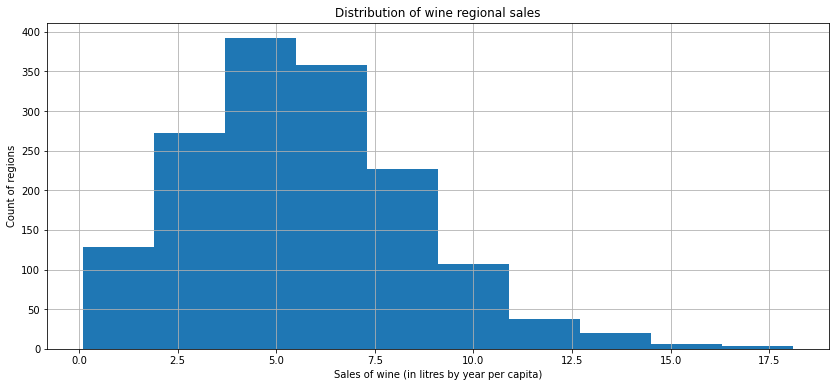

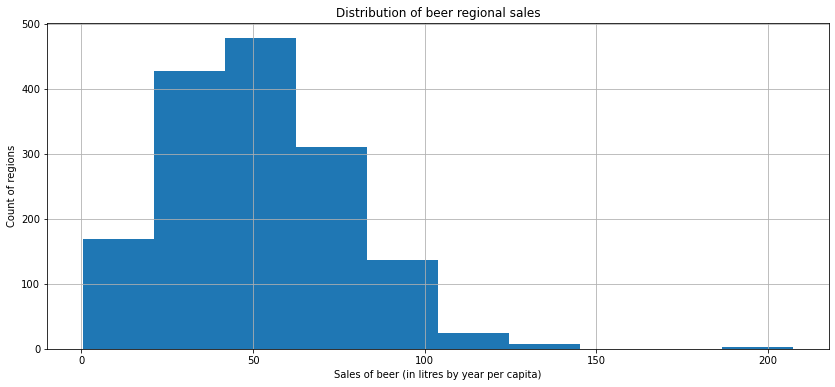

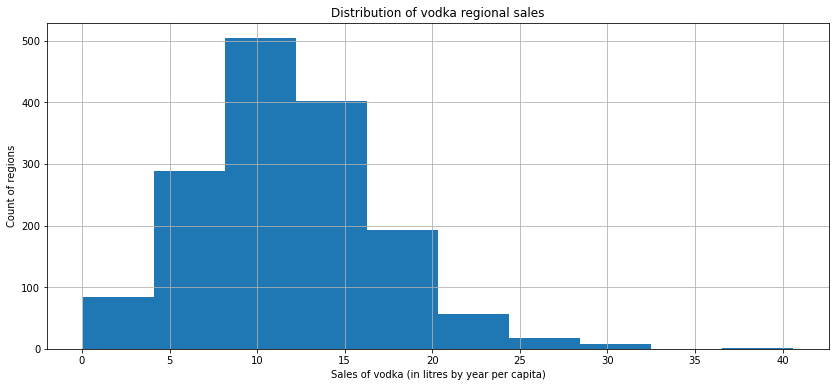

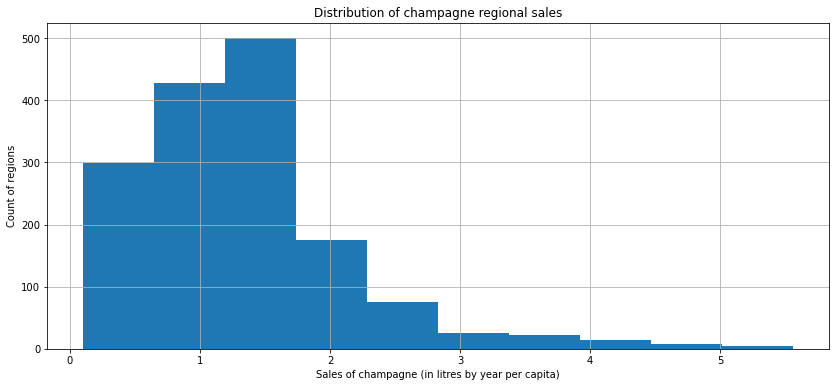

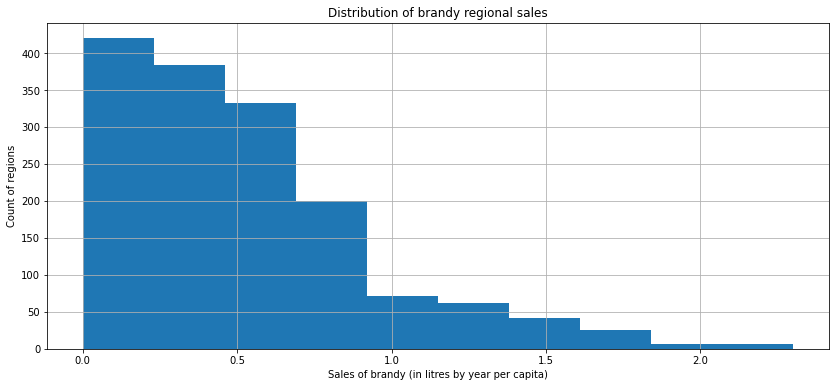

In [4]:
# Let's take a look at all of our numerical data:

# Take a look at distribution of each alcohol type
alc_type = ['wine', 'beer', 'vodka', 'champagne', 'brandy']

for i in alc_type:
    _ = alc.hist(i, figsize = (14,6))
    plt.title('Distribution of '+ i + ' regional sales')
    plt.xlabel('Sales of '+ i + ' (in litres by year per capita)')
    plt.ylabel('Count of regions')

Takeaways:
- wine, beer and vodka seem close to normal distribution, with chance of outliers
- champagne and brandy seem to have much longer tail on the right of its distribution

***Categorical Variables***

In [5]:
# Investigate how many regions exist
unique_regions = len(alc['region'].unique())
print('There are {} unique region data present in dataset'.format(unique_regions))

There are 85 unique region data present in dataset


In [6]:
# Print unique regions
print(alc['region'].unique())

['Republic of Adygea' 'Altai Krai' 'Amur Oblast' 'Arkhangelsk Oblast'
 'Astrakhan Oblast' 'Republic of Bashkortostan' 'Belgorod Oblast'
 'Bryansk Oblast' 'Republic of Buryatia' 'Vladimir Oblast'
 'Volgograd Oblast' 'Vologda Oblast' 'Voronezh Oblast'
 'Republic of Dagestan' 'Jewish Autonomous Oblast' 'Zabaykalsky Krai'
 'Ivanovo Oblast' 'Republic of Ingushetia' 'Irkutsk Oblast'
 'Kabardino-Balkar Republic' 'Kaliningrad Oblast' 'Republic of Kalmykia'
 'Kaluga Oblast' 'Kamchatka Krai' 'Karachay-Cherkess Republic'
 'Republic of Karelia' 'Kemerovo Oblast' 'Kirov Oblast' 'Kostroma Oblast'
 'Krasnodar Krai' 'Krasnoyarsk Krai' 'Republic of Crimea' 'Kurgan Oblast'
 'Kursk Oblast' 'Leningrad Oblast' 'Lipetsk Oblast' 'Magadan Oblast'
 'Mari El Republic' 'Republic of Mordovia' 'Moscow' 'Moscow Oblast'
 'Murmansk Oblast' 'Nenets Autonomous Okrug' 'Nizhny Novgorod Oblast'
 'Novgorod Oblast' 'Novosibirsk Oblast' 'Omsk Oblast' 'Orenburg Oblast'
 'Oryol Oblast' 'Penza Oblast' 'Perm Krai' 'Primorsky Kra

After observing the unique values of the "region" column, you can notice some repeated values, like "Oblasts" and "Republics"

A quick wikipedia search reveals they are the constituent entities that serve as "top-level politicial divisions" in Russia's Constitution. Subjects of Russian federations, what they are known as, are comprised of 46 Oblasts, 22 republics, 9 krais, 4 automomous okrugs, 3 fedeeral cities and 1 autonomous oblasts.

Quick definition of each from wikipedia are listed below: (Thanks Wikipedia!)

The most common type of federal subject with a governor and locally elected legislature. Commonly named after their administrative centres.
- Oblasts : The most common type of federal subject with a governor and locally elected legislature. Commonly named after their administrative centres.
- Republics : Nominally autonomous, each with its own constitution, language, and legislature but represented by the federal government in international affairs. Each is home to a specific ethnic minority.
- Krais : For all intents and purposes, krais are legally identical to oblasts. The title "krai" ("frontier" or "territory") is historic, related to geographic (frontier) position in a certain period of history. The current krais are not related to frontiers.
- Autonomous okrugs : Occasionally referred to as "autonomous district", "autonomous area", and "autonomous region", each with a substantial or predominant ethnic minority.
- Federal cities : 	Major cities that function as separate regions.
- Autonomous oblasts : 	The only autonomous oblast is the Jewish Autonomous Oblast.

In addition, individual subjects are grouped into varying federal district and economic region, which may become a subject of interest.

In [7]:
# See if sales data is distributed across all years
alc.groupby('year').count()

,region,wine,beer,vodka,champagne,brandy
year,,,,,,
1998,85,81,81,81,81,81
1999,85,81,81,81,81,81
2000,85,81,81,81,81,81
2001,85,82,82,82,82,82
2002,85,82,82,82,82,82
2003,85,82,82,82,82,82
2004,85,82,82,82,82,82
2005,85,82,82,82,82,81
2006,85,82,82,82,82,81


More than 80 lines exist per year for all alcoholic beverage sale, but the varying number suggest that we may need to clean up miissing data.

## Data Cleaning

### Missing Data:

The first thing I noticed when looking at the .info() printout was that there are missing values spread across different numeric columns. With the help of missingno package, I'll visualize and identify if there are systematic patterns in which the values are missing:


<AxesSubplot:>

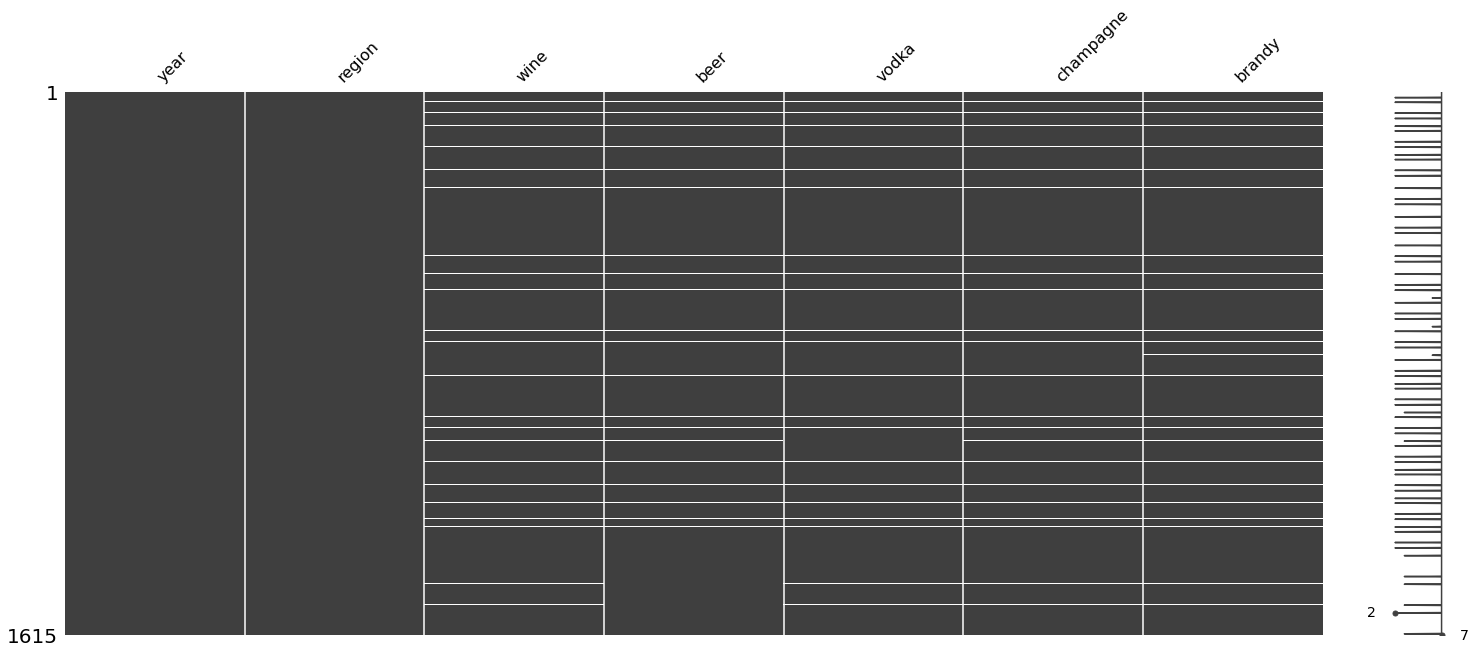

In [8]:
# Visualize missing values (mising data is white strips)
import missingno as msno

msno.matrix(alc)

White lines that extend acorss all numeric columns suggest that there are certain combination of region/years that has an entire row of missing data. 

Is this systemtatic? I need to visualize again by grouping the data by year and/or region: 

<AxesSubplot:>

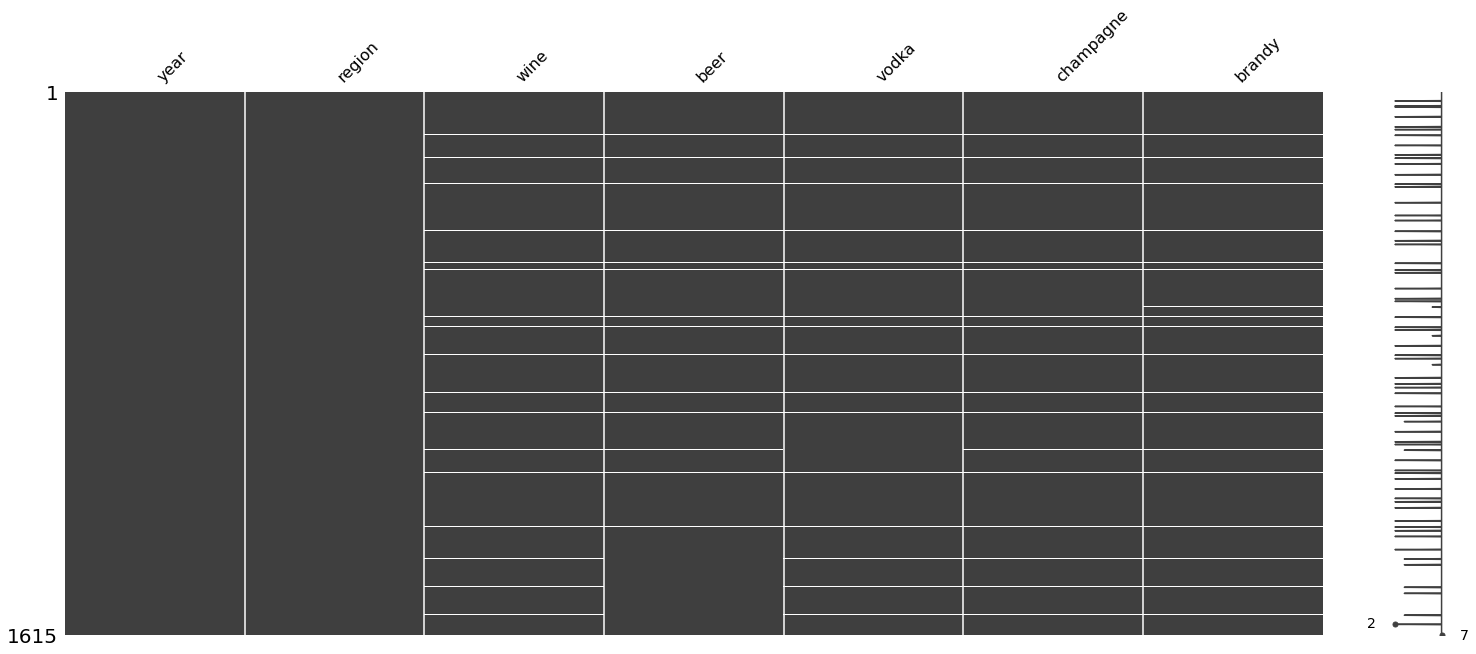

In [9]:
# Visualize missing data - sorted by year
alc_yearsort = alc.sort_values('year')
msno.matrix(alc_yearsort)

<AxesSubplot:>

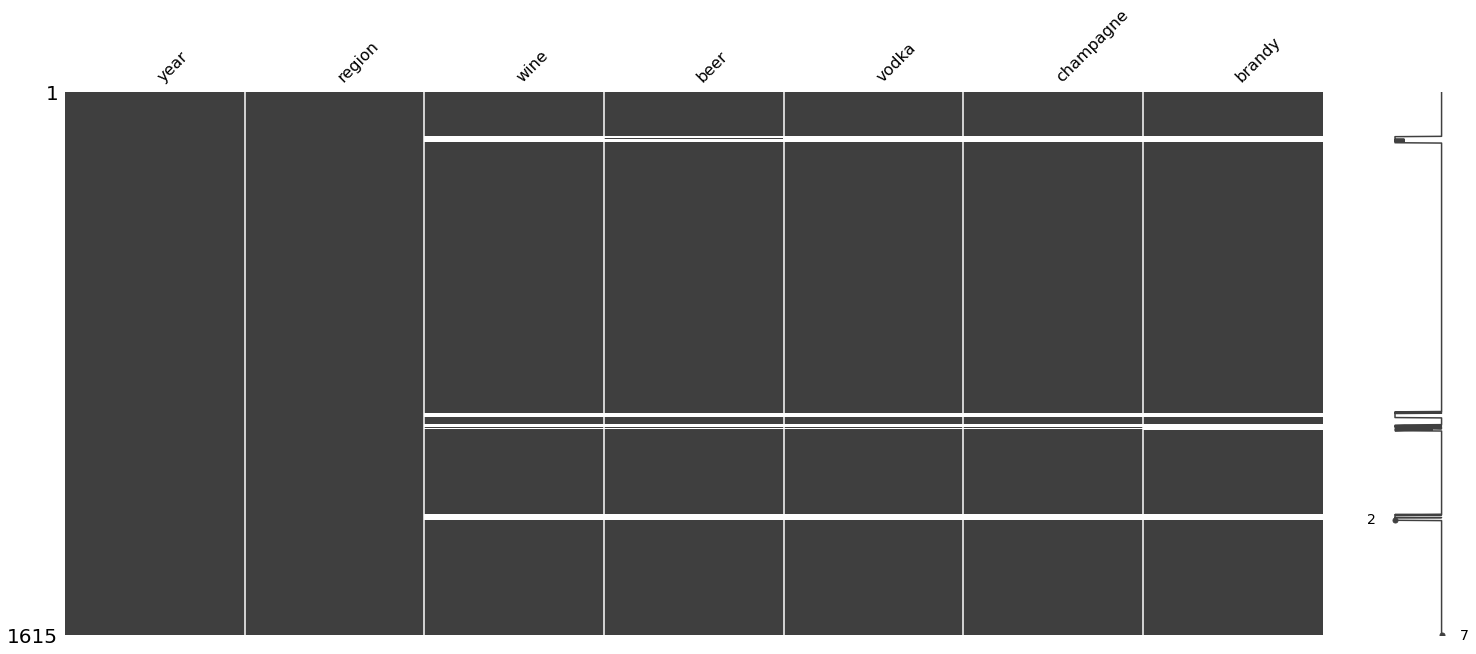

In [10]:
# Visualize missing data - grouped by region
alc_regionsort = alc.sort_values('region')
msno.matrix(alc_regionsort)

Takeaway:
- There are many rows in where a consecutive years of a same region are missing all numeric values.

In [11]:
# subset data with missing 'wine' data and see which regions are missing
alc_wine_na = alc[alc['wine'].isna()]
alc_wine_na.value_counts('region')

region
Chechen Republic          19
Sevastopol                16
Republic of Crimea        16
Republic of Ingushetia    12
dtype: int64

Now that we have identified regions where empty data is coming from, I need to investigate them individually and decide whether the data is going to be kept, imputed or dropped. 

Text(0.5, 1.0, 'Missing data where region = "Republic of Ingushetia"')

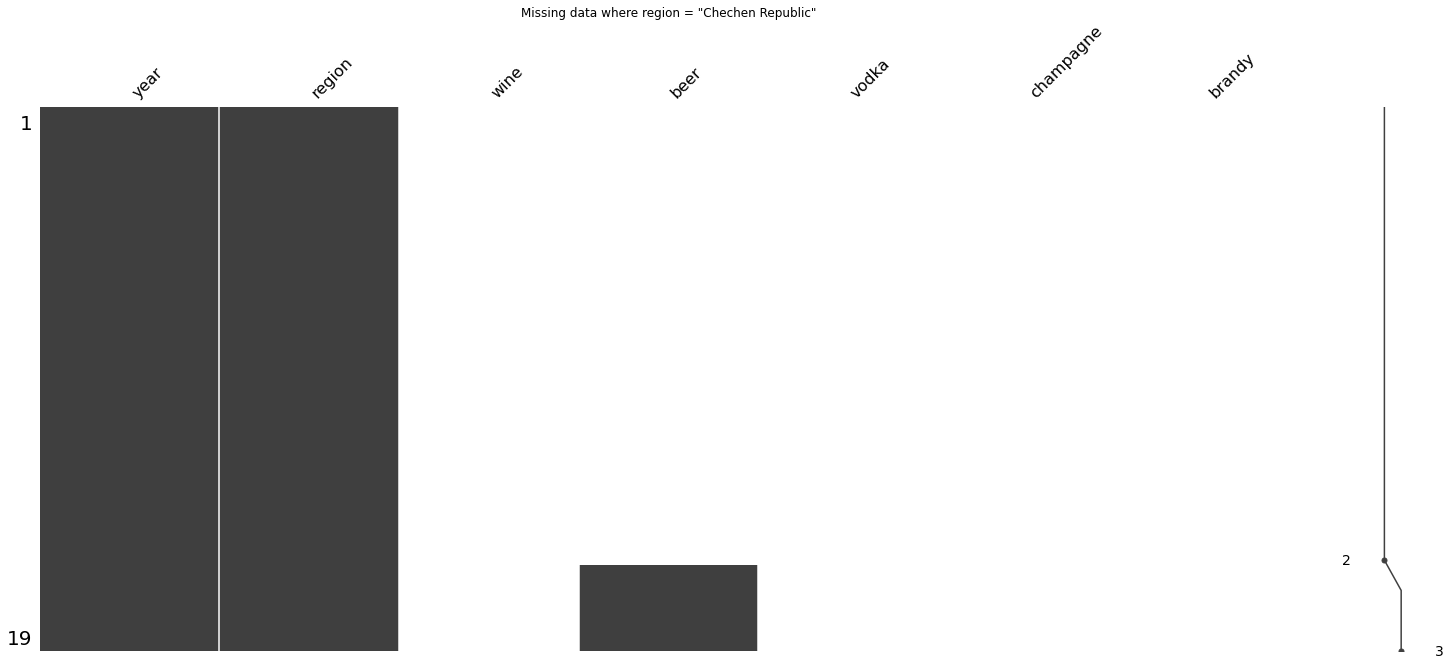

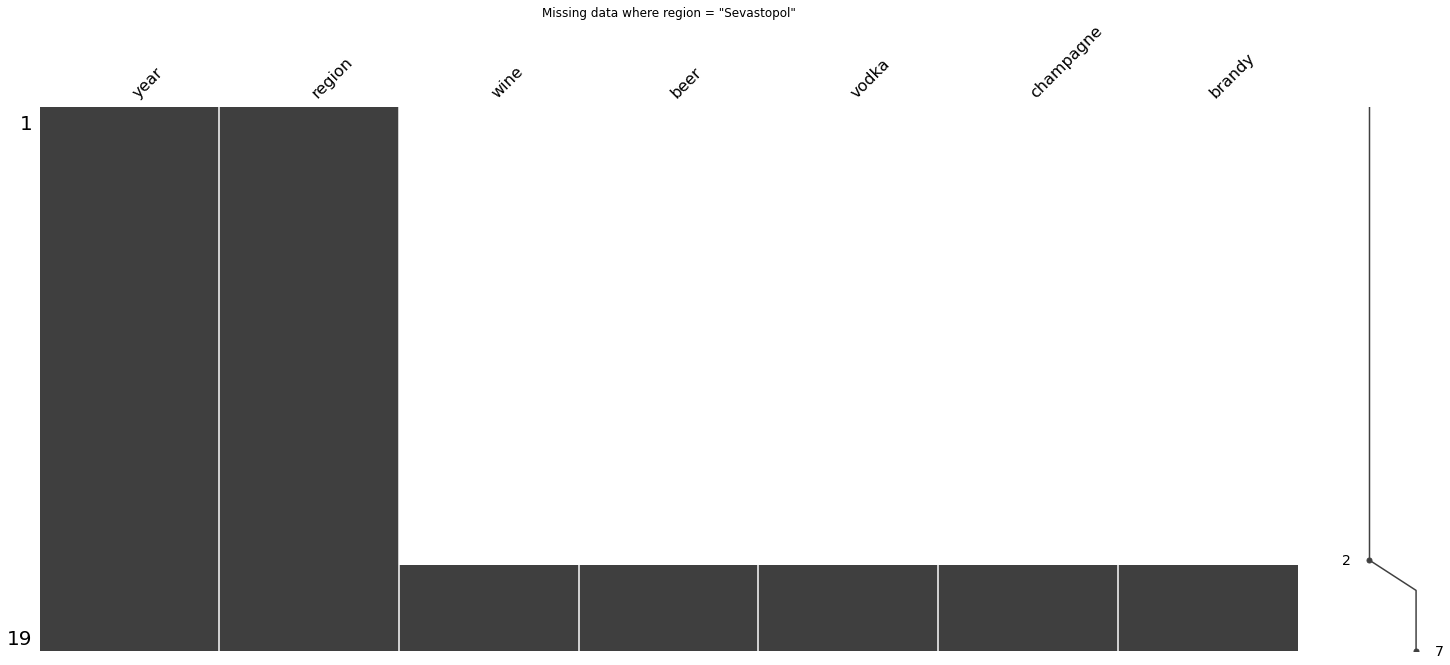

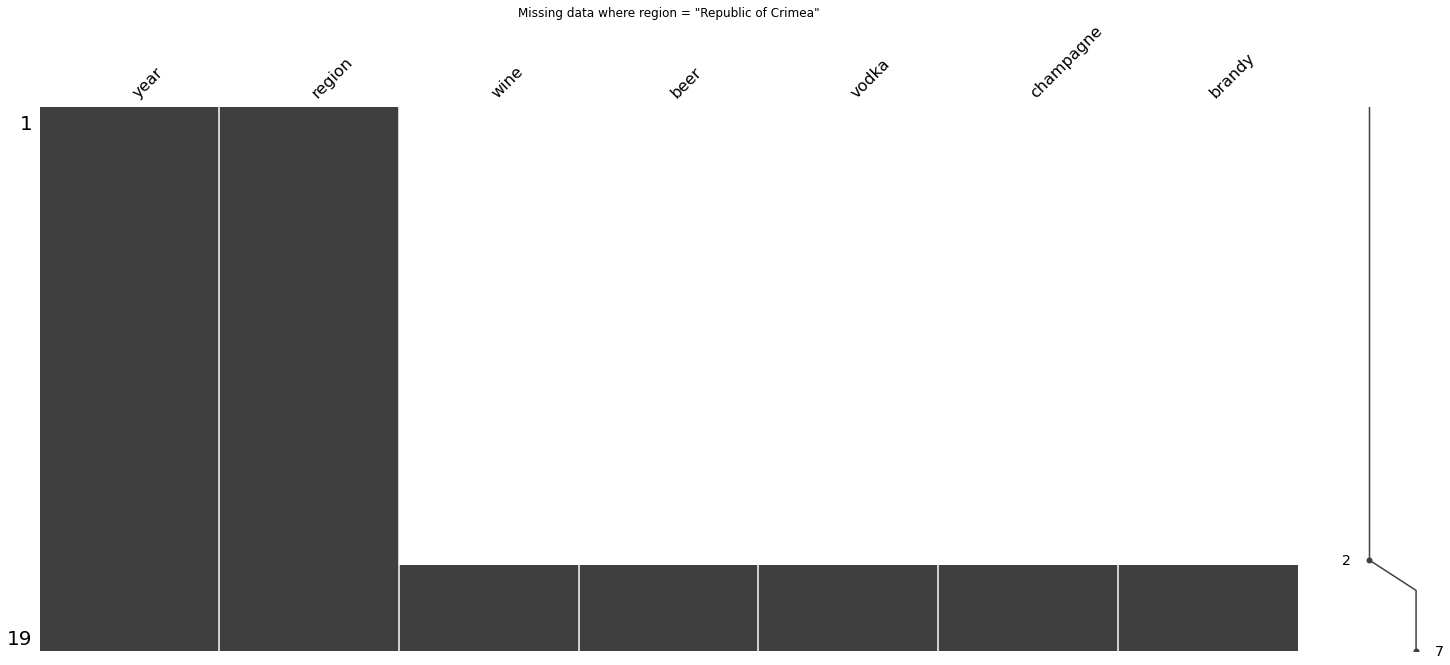

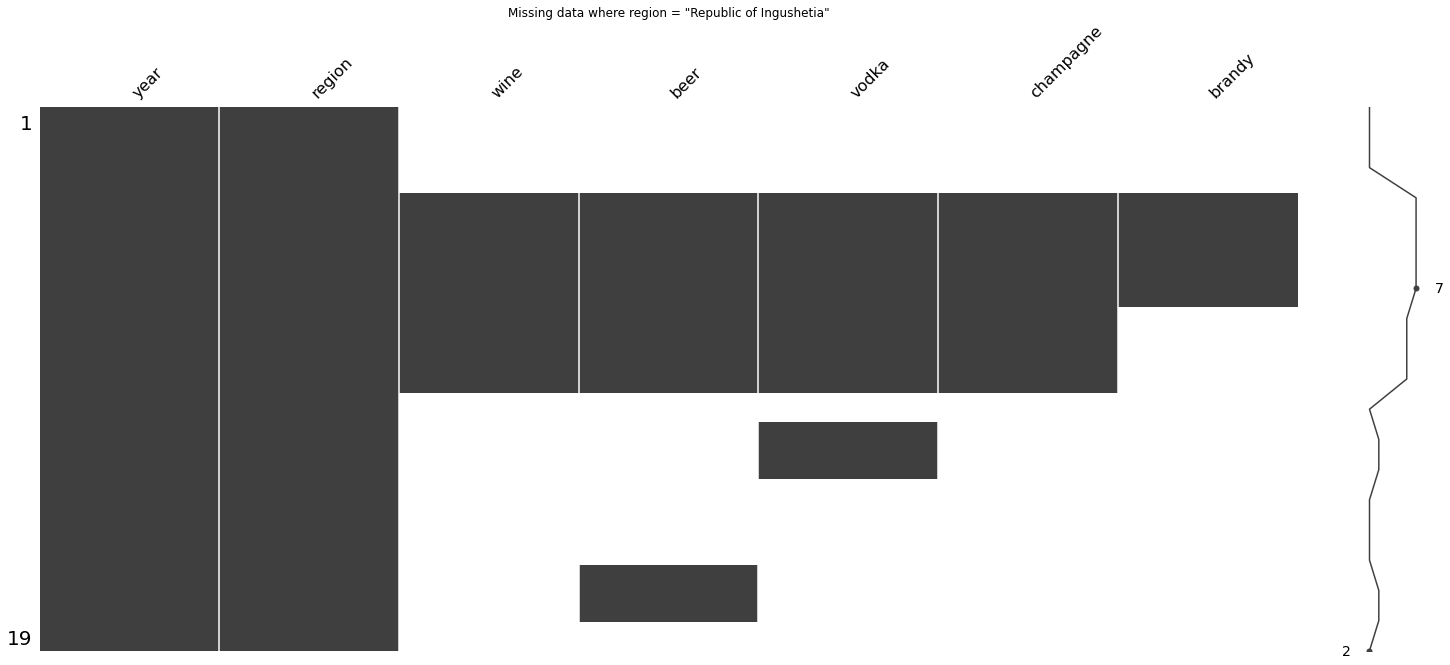

In [12]:
# investigate invididual regions with missing data

# visualize missing data as white strips for 'region' = 'chechen republic'
alc_chechen = alc[alc['region'] == 'Chechen Republic']
alc_chechen_yearsort = alc_chechen.sort_values('year')
msno.matrix(alc_chechen_yearsort)
plt.title('Missing data where region = "Chechen Republic"')

# visualize missing data as white strips for 'region' = 'Sevastopol'
alc_sev = alc[alc['region'] == 'Sevastopol']
msno.matrix(alc_sev.sort_values('year'))
plt.title('Missing data where region = "Sevastopol"')

# visualize missing data as white strips for 'region' = 'Republic of Crimea'
alc_cri = alc[alc['region'] == 'Republic of Crimea']
msno.matrix(alc_cri.sort_values('year'))
plt.title('Missing data where region = "Republic of Crimea"')

# visualize missing data as white strips for 'region' = 'Republic of Ingushetia'
alc_ing = alc[alc['region'] == 'Republic of Ingushetia']
msno.matrix(alc_ing.sort_values('year'))
plt.title('Missing data where region = "Republic of Ingushetia"')

Takeaway:
- Values from Chechen Republic is mostly empty without any complete rows; therefore, I should drop the data on the entire region 
- Values from Sevastopol and Crimea is filled by row in later years; therefore I should only keep rows with complete data
- Values from Ingushetia has few complete rows and incomplete rows with 'brandy' value missing in middle years; I will keep complete rows and impute data for years in which brandy data is missing

In [13]:
# drop values from Chechen Republic
mask = alc['region'] == 'Chechen Republic'
alc_no_chechen = alc[~mask]

In [14]:
# keep values from Sevastopol and Crimea with complete rows
mask1 = (alc_no_chechen['region'] == 'Sevastopol') | (alc_no_chechen['region'] == 'Republic of Crimea') 
mask2 = alc_no_chechen['year'] < 2014
alc_no_sev_cri = alc_no_chechen[~(mask1&mask2)]

In [15]:
# keep values from Republic of Ingushetia with complete rows and rows with only brandy data missing 
mask1 = (alc_no_sev_cri['region'] == 'Republic of Ingushetia')
mask2 = (alc_no_sev_cri['year']<2001) | (alc_no_sev_cri['year']>2007)
alc_no_ing = alc_no_sev_cri[~(mask1 & mask2)]

# impute brandy data
mask1 = (alc_no_ing['region'] == 'Republic of Ingushetia')
mask2 = (alc_no_ing['brandy'].isnull())
alc_no_ing.loc[(mask1 & mask2), 'brandy'] = 0.8
alc_no_na = alc_no_ing

C:\Users\JintaePark\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
# Let's check the number of missing values present by columns
alc_no_na.isna().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

### Dealing with Outliers

Text(0, 0.5, 'Alcohol type')

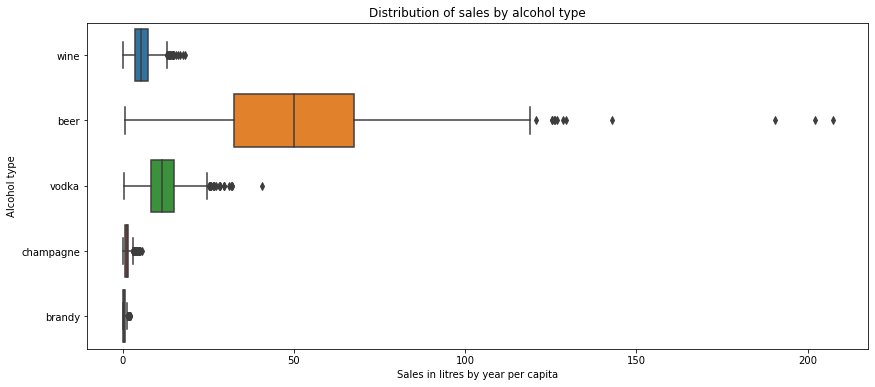

In [17]:
# Create tidy data for boxplot
id_vars = ['year', 'region']
value_vars = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
alc_no_na_tidy = alc_no_na.melt(id_vars=id_vars, value_vars=value_vars, var_name='type')

# Create Boxplot
plt.figure(figsize=(14,6))
sns.boxplot(x='value', y='type', data=alc_no_na_tidy)
plt.title('Distribution of sales by alcohol type')
plt.xlabel('Sales in litres by year per capita')
plt.ylabel('Alcohol type')

Text(0, 0.5, 'Alcohol type')

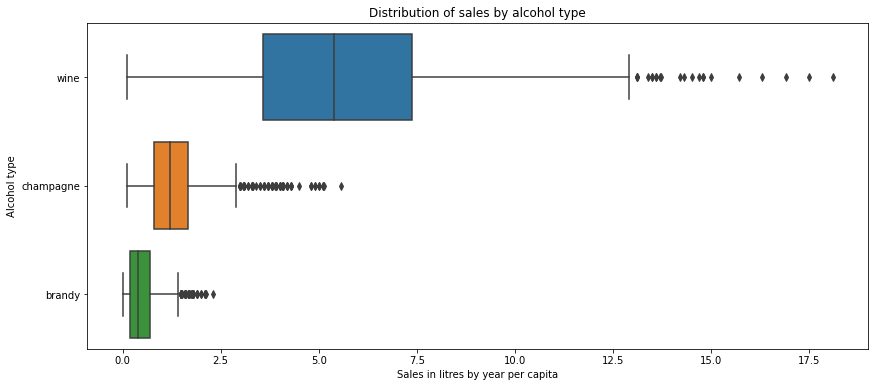

In [18]:
# It was hard to see the visualization for wine, champagne and brandy data

# Create a separate Boxplot just for those two column
plt.figure(figsize=(14,6))
sns.boxplot(x='value', y='type', data=alc_no_na_tidy[alc_no_na_tidy['type'].isin(['wine', 'champagne', 'brandy'])])
plt.title('Distribution of sales by alcohol type')
plt.xlabel('Sales in litres by year per capita')
plt.ylabel('Alcohol type')

##### Takeaway:
- There are siginificant number values beyond the (75 percentile) + 1.5IQR, but is close to the threshhold. They are most likely legitamte observations and should not be removed.
- However, there are some datapoints well beyond the cluster of high values. I'll visualize them alongside of its regional data to gather context

"Outlier" Suspects:
- "wine" column : top 5 data points in value
- "beer" column : top 4 data points in value  
- "vodka" column : top data point in value
- "champagne" column : top 4 data points in value
- "brandy" column : top data point in value

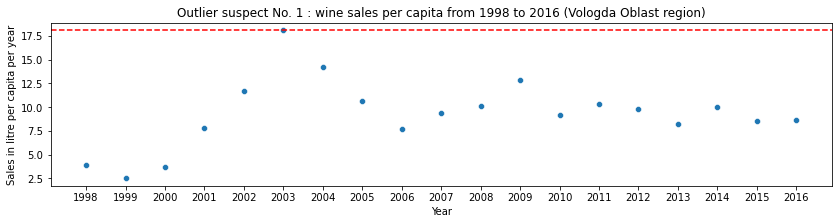

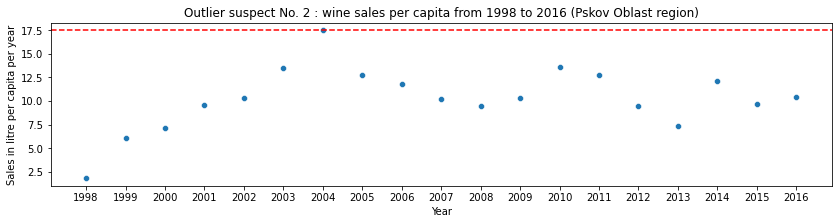

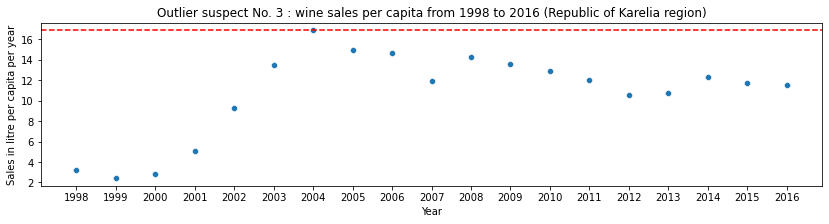

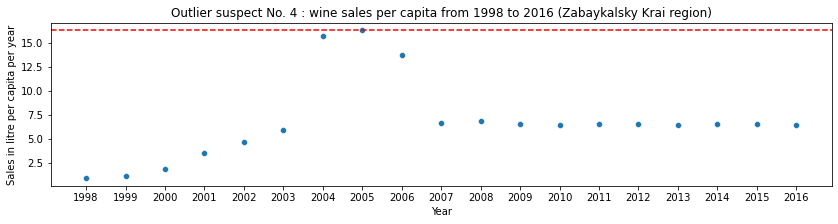

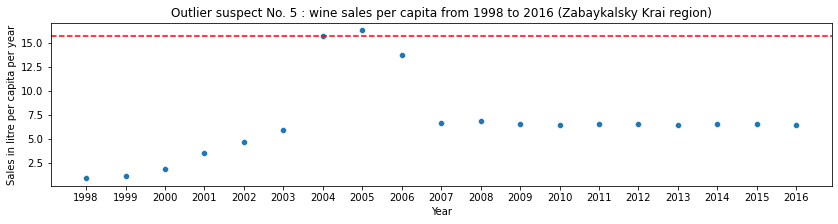

In [19]:
# Create function to visualize outlier suspects
def visualize_outliers(alc, value):
    alc_type = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
    column = [2,3,4,5,6]
    alc_column = pd.DataFrame({'alc':alc_type, 'col':column})
    alc_column.set_index('alc', inplace=True)

    outlier = alc_no_na.sort_values(alc, ascending = False).head(value)

    for i, region in enumerate(outlier['region']):
        plt.figure(figsize=(14,3))
        sns.scatterplot(x='year', y=alc, data=alc_no_na[alc_no_na['region'] == region])
        plt.title('Outlier suspect No. {} : {} sales per capita from 1998 to 2016 ({} region)'.format(i+1, alc, region))
        plt.xlabel('Year')
        plt.ylabel('Sales in litre per capita per year')
        plt.xticks(np.arange(1998, 2017))
        plt.axhline(outlier.iloc[i, alc_column.loc[alc,'col']], color = 'red', linestyle = '--')

# visualize wine outlier suspects along with its regional trend:
visualize_outliers('wine', 5)

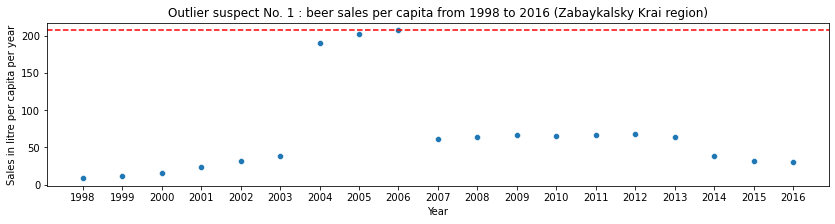

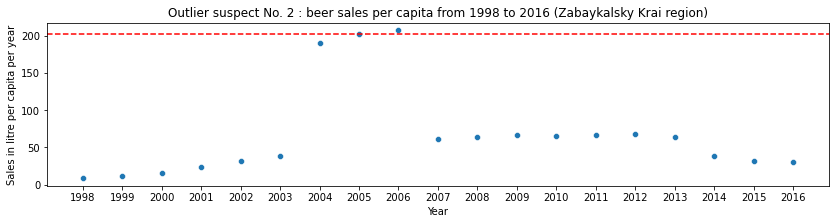

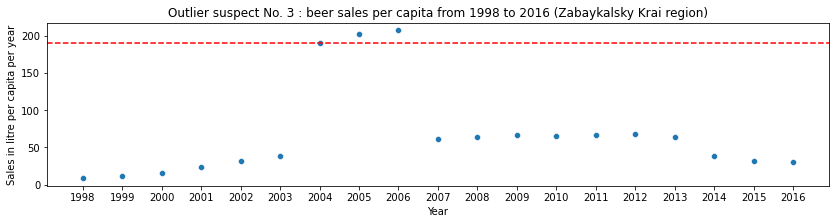

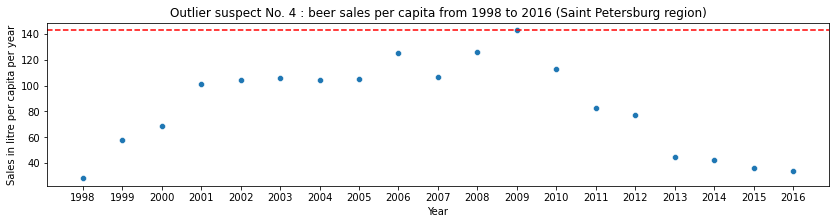

In [20]:
# viualize beer outlier suspects
visualize_outliers('beer', 4)

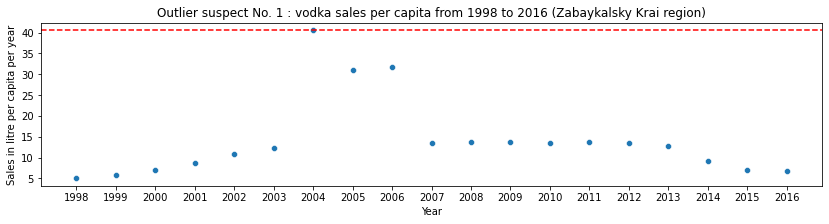

In [21]:
# visualize vodka sale outliers
visualize_outliers('vodka', 1)

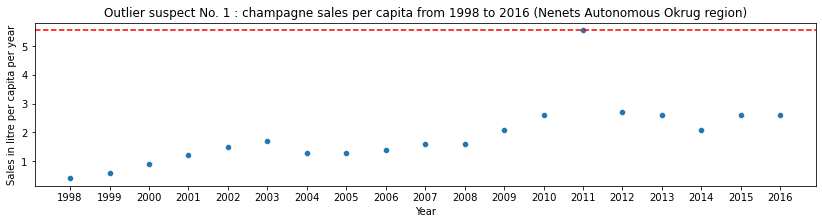

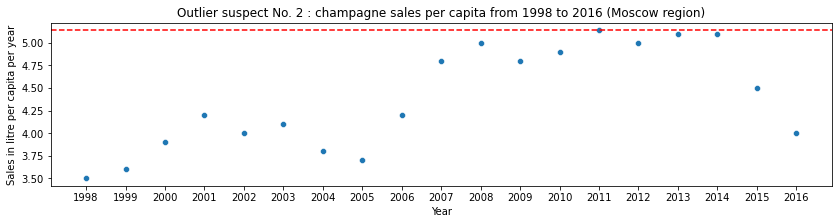

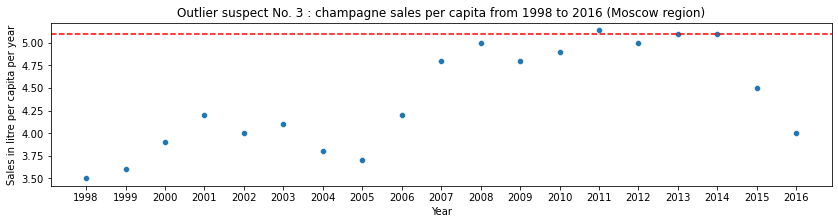

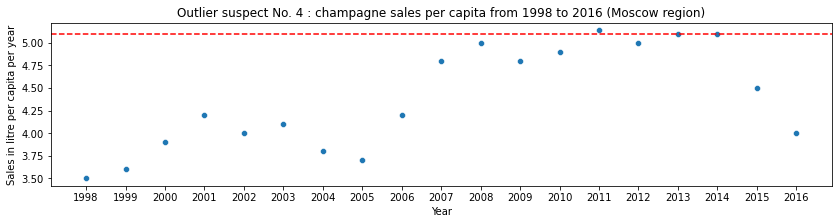

In [22]:
# visualize # champagne sale outlier
visualize_outliers('champagne', 4)

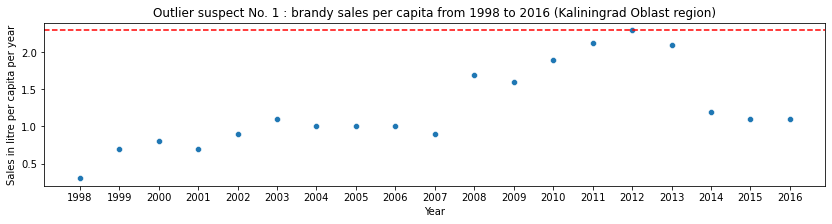

In [23]:
# visualize brandy sale outliers
visualize_outliers('brandy', 1)

Many outlier suspects were in 2004-2006 Zabaykalsky Krai region. I need to take a deeper look at them:

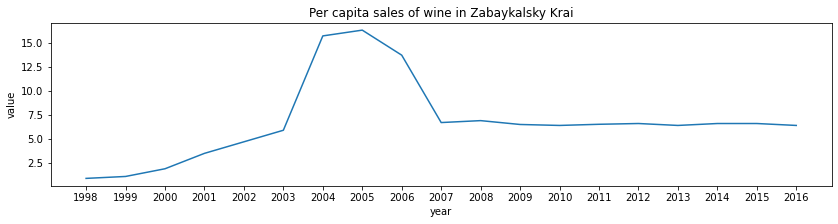

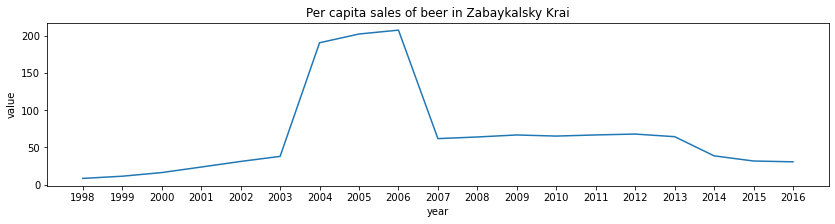

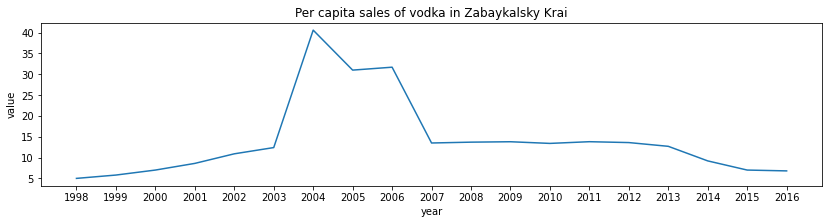

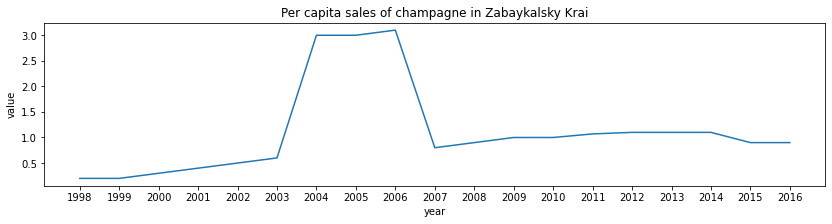

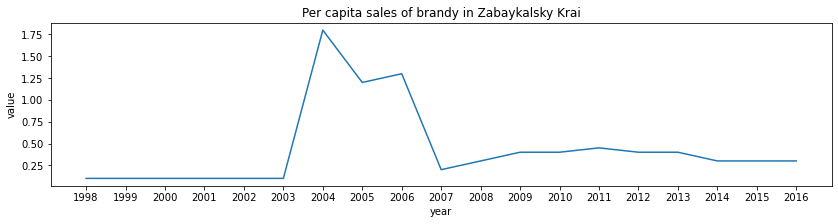

In [24]:
# Investigate Zabaykalsky region data
alc_zab = alc_no_na[alc_no_na['region'] == 'Zabaykalsky Krai']
alc_zab_tidy = pd.melt(alc_zab, \
                       id_vars=['year','region'], \
                       value_vars=['wine','beer','vodka','champagne','brandy'], \
                       var_name='type')

alc_type = ['wine','beer','vodka','champagne','brandy']

for alc in alc_type:
    plt.figure(figsize=(14,3))
    sns.lineplot(x='year', y='value', data=alc_zab_tidy[alc_zab_tidy['type'] == alc])
    plt.title('Per capita sales of {} in Zabaykalsky Krai'.format(alc))
    plt.xticks(np.arange(1998, 2017))

Takeaway:
- There is no siginificant historical event that leads me to believe that there would be a surge of 5 - 10x in alcohol sales per capita across multiple products. I am considering this a human error in data recording.
- I believe it is safe for me to eliminate data from this region where years are between 2003 and 2006.

In [25]:
# eliminate error-prone data
anti_mask1 = (alc_no_na['region'] == 'Zabaykalsky Krai')
anti_mask2 = (alc_no_na['year']>2003) & (alc_no_na['year']<2007)
alc_clean = alc_no_na[~(anti_mask1 & anti_mask2)]
alc_clean[alc_clean['region'] == 'Zabaykalsky Krai']

,year,region,wine,beer,vodka,champagne,brandy
15,1998,Zabaykalsky Krai,0.90,8.60,5.00,0.20,0.10
100,1999,Zabaykalsky Krai,1.10,11.50,5.80,0.20,0.10
185,2000,Zabaykalsky Krai,1.90,16.40,7.00,0.30,0.10
270,2001,Zabaykalsky Krai,3.50,23.80,8.60,0.40,0.10
355,2002,Zabaykalsky Krai,4.70,31.30,10.90,0.50,0.10
440,2003,Zabaykalsky Krai,5.90,38.10,12.40,0.60,0.10
780,2007,Zabaykalsky Krai,6.70,61.90,13.50,0.80,0.20
865,2008,Zabaykalsky Krai,6.90,64.10,13.70,0.90,0.30
950,2009,Zabaykalsky Krai,6.50,66.80,13.80,1.00,0.40
1035,2010,Zabaykalsky Krai,6.40,65.30,13.40,1.00,0.40


## Data Exploration

### Distribution of numerical variables

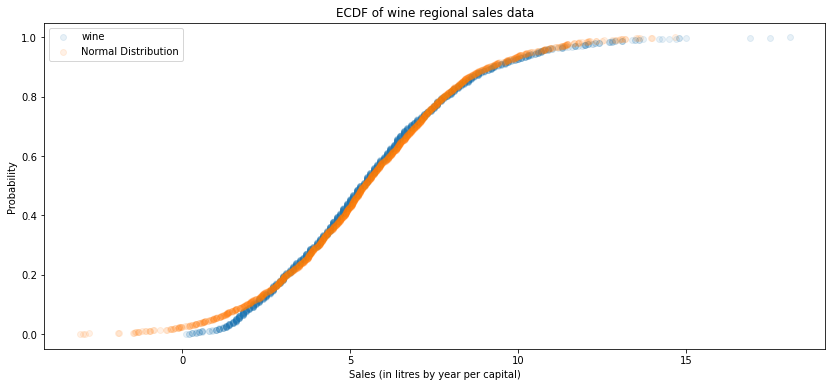

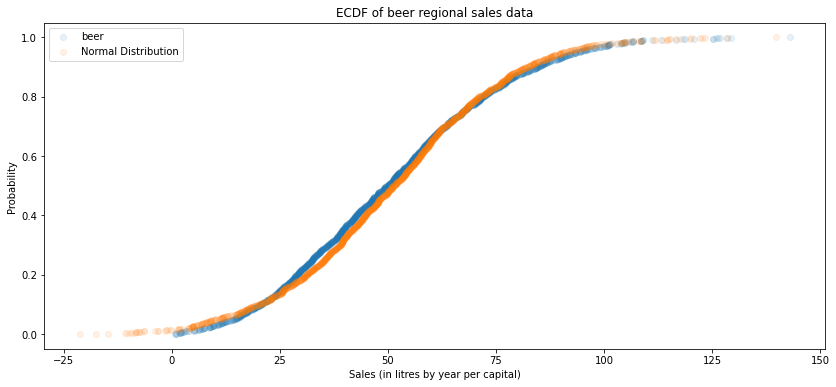

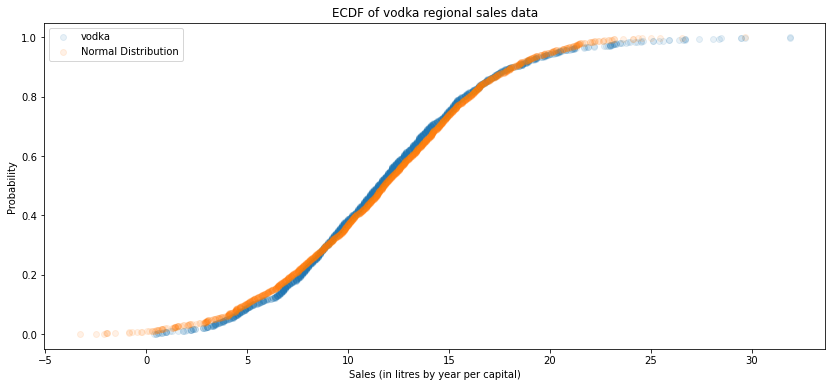

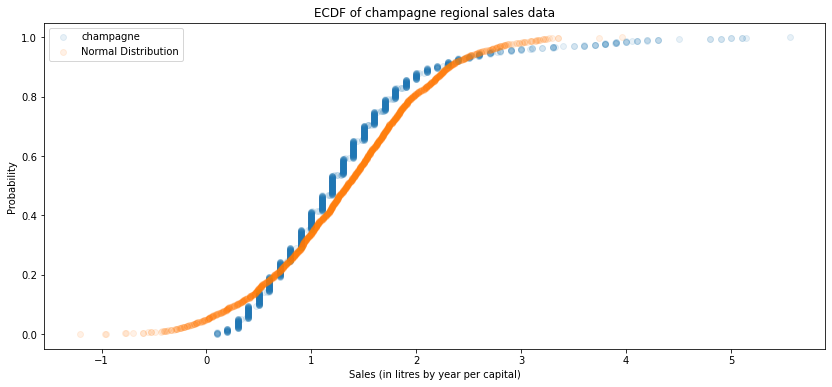

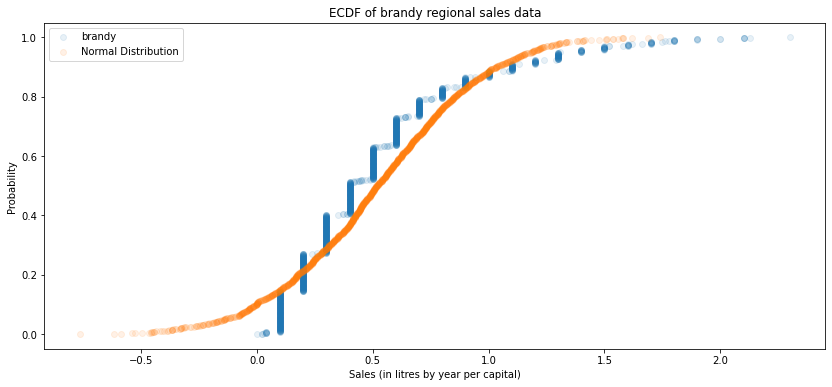

In [26]:
# Let's take a further look at the distribution of the each variables

# define a function to graph empirical cumulative distribution function
np.set_seed = 15
def ecdf(data, label):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    
    x_norm = np.sort(np.random.normal(loc=np.mean(data), scale=np.std(data), size = len(data)))
    y_norm = y
    
    plt.figure(figsize=(14,6))
    _ = plt.scatter(x, y, alpha = 0.1, label=label)
    _ = plt.scatter(x_norm, y_norm, alpha=0.1, label='Normal Distribution')
    
    plt.title('ECDF of ' + label + ' regional sales data')
    plt.xlabel('Sales (in litres by year per capital)')
    plt.ylabel('Probability')
    plt.legend()

# Graph ECDF of 
ecdf(alc_clean['wine'], 'wine')
ecdf(alc_clean['beer'], 'beer')
ecdf(alc_clean['vodka'], 'vodka')
ecdf(alc_clean['champagne'], 'champagne')
ecdf(alc_clean['brandy'], 'brandy')

Wine, beer and vodka is comparable to normal function, but not champagne and brandy data. 

I need to work other columns with some data transformation.

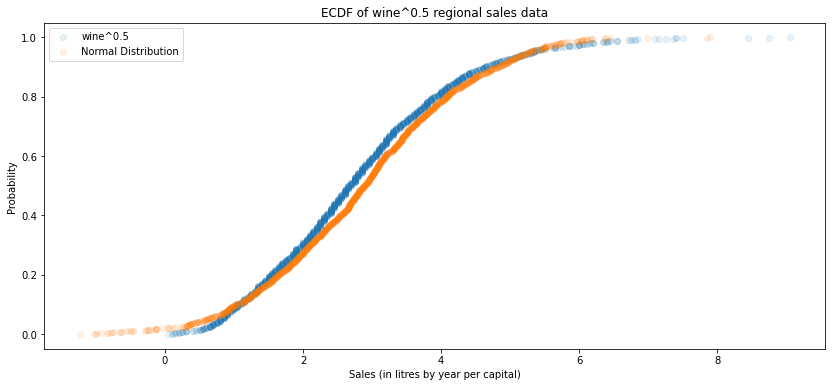

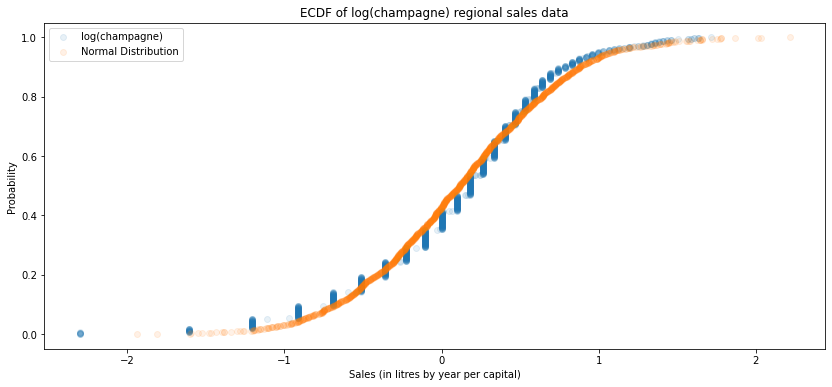

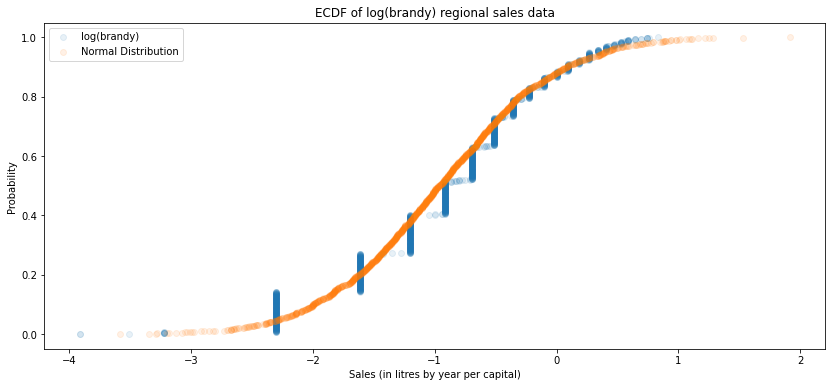

In [27]:
# Creating ECDF of transformed data

# sqrt of wine
ecdf(alc_clean['wine']**1/2, 'wine^0.5')

# log of champagne and brandy
ecdf(np.log(alc_clean['champagne']), 'log(champagne)')
ecdf(np.log(alc_clean[alc_clean['brandy']>0]['brandy']), 'log(brandy)') # dropping zero because log(0) = -inf

Takeaway:
- beer and vodka data is close to being normally distributed
- wine data is close to being normally distributed
- Brandy data is incremental at small amount of decimal values
- log(champagne) and log(brandy) is closer to being normally distributed

### Multiple variables : Correlation between numeric variables

Text(0.5, 1.0, 'Heatmap of alcohol sales by type and year')

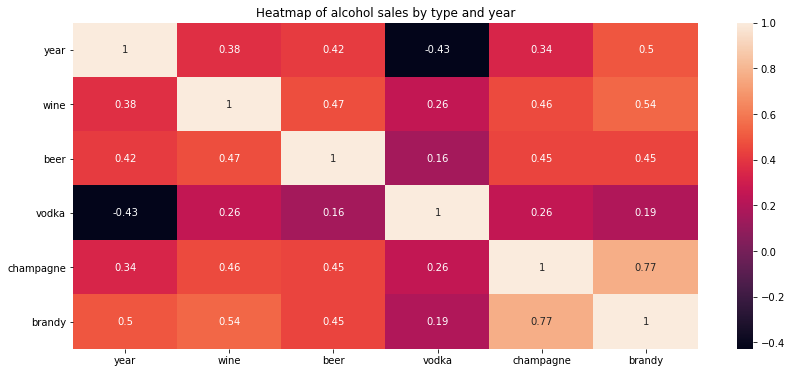

In [28]:
# Heatmap to see the correlation
plt.figure(figsize=(14,6))
sns.heatmap(alc_clean.corr(), annot=True)
plt.title('Heatmap of alcohol sales by type and year')

Text(0, 0.5, 'Brandy sales in liters per capita per year')

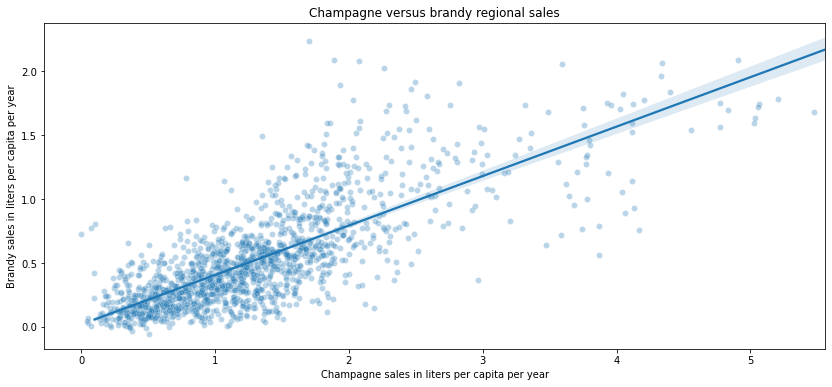

In [29]:
# Champagne versus brandy sale
plt.figure(figsize=(14,6))
_ =sns.scatterplot(x=(x + np.random.normal(0, 0.05) for x in alc_clean['champagne']),\
                y=(x + np.random.normal(0, 0.05) for x in alc_clean['brandy']), \
                alpha = 0.3)
_ = sns.regplot(x=alc_clean['champagne'], y=alc_clean['brandy'], scatter=False)
plt.title('Champagne versus brandy regional sales')
plt.xlabel('Champagne sales in liters per capita per year')
plt.ylabel('Brandy sales in liters per capita per year')

Text(0, 0.5, 'Brandy sales in liters per capita per year')

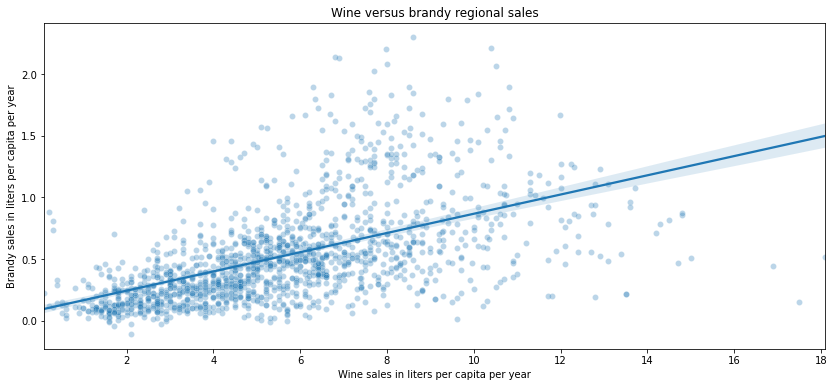

In [30]:
# Wine versus brandy sale
plt.figure(figsize=(14,6))
_ =sns.scatterplot(x=alc_clean['wine'],\
                y=(x + np.random.normal(0, 0.05) for x in alc_clean['brandy']), \
                alpha = 0.3)
_ = sns.regplot(x=alc_clean['wine'], y=alc_clean['brandy'], scatter=False)
plt.title('Wine versus brandy regional sales')
plt.xlabel('Wine sales in liters per capita per year')
plt.ylabel('Brandy sales in liters per capita per year')

C:\Users\JintaePark\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\JintaePark\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0, 0.5, 'Non-vodka (alcoholic) sales in liters per capita per year')

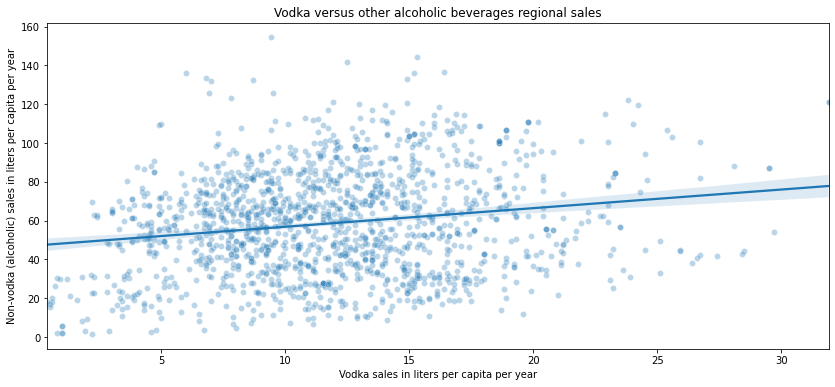

In [31]:
# Vodka versus everything else
alc_clean.loc[:,'no_vodka'] = alc_clean.loc[:,'wine'] + alc_clean.loc[:,'beer'] + alc_clean.loc[:,'champagne'] + alc_clean.loc[:,'brandy']

plt.figure(figsize=(14,6))
_ =sns.scatterplot(x=alc_clean['vodka'],\
                y=alc_clean['no_vodka'], \
                alpha = 0.3)
_ = sns.regplot(x=alc_clean['vodka'], y=alc_clean['no_vodka'], scatter=False)
plt.title('Vodka versus other alcoholic beverages regional sales')
plt.xlabel('Vodka sales in liters per capita per year')
plt.ylabel('Non-vodka (alcoholic) sales in liters per capita per year')

Takeaway:
- Every column is positively correlated with year except vodka. One may suggest that Russians are moving away from vodka as years pass. This will be further examined with regressions.
- However, vodka does still have positive relationship with other alcoholic sales, not negative
- It is just that vodka has weaker (postiive) correlation with other alcohol sales than correlation between other alcohol sales
- Champagne and brandy data and are strongly correlated, and wine is also shows good level of correlation with both of them. This is understandable considering all of them are luxury goods. One of them needs to be eliminated when performing regression task for multi-coliniarity

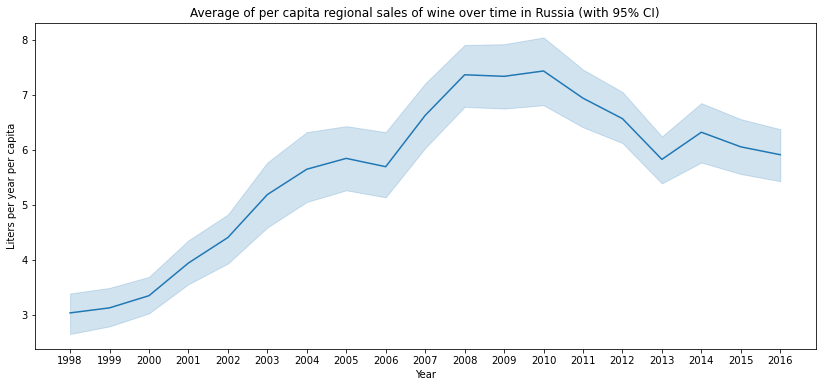

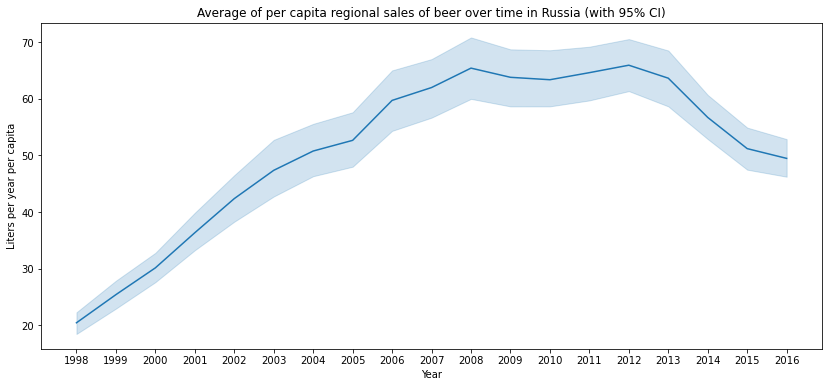

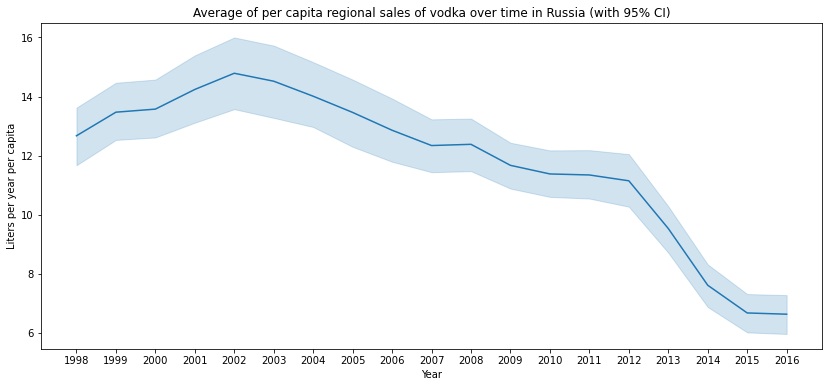

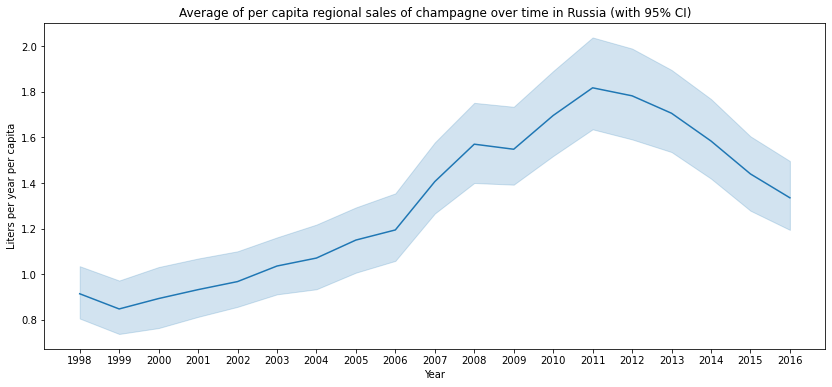

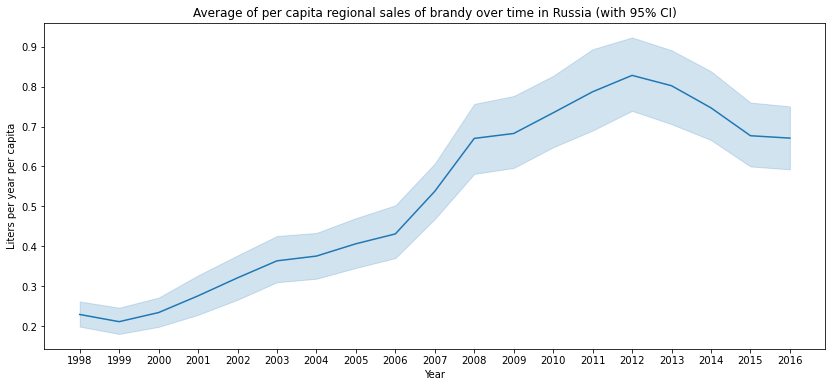

In [32]:
# create a graph with time-series data
alc_type = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
for alc in alc_type:
    plt.figure(figsize=(14,6))
    sns.lineplot(x=alc_clean['year'], y=alc_clean[alc])
    plt.title('Average of per capita regional sales of ' + alc + ' over time in Russia (with 95% CI)')
    plt.xlabel('Year')
    plt.ylabel('Liters per year per capita')
    plt.xticks(np.arange(1998, 2017))

Takeaway
- All alcohol types present except vodka had steady growth in per capita sales until early 2010's (2011~2013)
- Vodka sales peaked at 2002 and has been steadily decresing
- But how can we assess whether vodka is Russian's drink of choice or not?

### This begs the question...

Based on this data, can we determine what the most popular alcoholic beverage is in Russia out of wine, vodka, beer, brandy and champagne? 

Vodka sales has been on a decline the past decade while beer and wine sales have steadyly increased until the beginning of 2010s. Should the numbers be compared on face value or do they need some kind of scailing, considering that they are different beverages?

Also, should we compare the average of regional per capita data? The sales data is an per capita data by regions and therefore not scaled by the amount of population per region.

For the the analysis, I have decided to:
1. Scale the data by the alcoholic volume
2. Use the regional averages to capture national trends rather than scailing each regional data by population. 

***Scaling data***
I suggest that all sales value be scaled based on their typical aloholic content, and scailed data compare the alcohlic volumne sold rather than the total volume.

Imagine a typical glass of beer you might order at an American restaurant or a bar. They would come in an American pint glass (16 US fluid ounces), which translates to roughly 500ml of volume. Pint of beer is ususally a manageable amount for for a healthy adult to drink because a typical beer is composed of 5~10% of alcohol. 

However, if you were offered a pint of vodka to drink, it would be much less manageable and probably dangerous. Typical vodka is composed of 40% alcohol and your body can only handle so much alcohol at once.

In a similar train of thought, in order for us to analyze the level of consumption capacity of alcoholic beverages of varying strength, we would have to put them in an equal scale, alcohol by volume.

Quick goole search reveals that average alcohol content per beverage are: (citations needed)
- Wine : 11.6% 
    - Source : https://www.masterclass.com/articles/learn-about-alcohol-content-in-wine-highest-to-lowest-abv-wines#:~:text=ABV%20is%20the%20global%20standard,with%20an%20average%20of%2018%25.
- Beer : 5%
    - Source : https://www.niaaa.nih.gov/alcohols-effects-health/overview-alcohol-consumption/what-standard-drink#:~:text=That's%20why%20it's%20important%20to,is%20usually%20about%205%25%20alcohol
- Vodka : 40%
    - Source : https://www.alcoholrehabguide.org/alcohol/types/#:~:text=Vodka,ABV%20in%20the%20United%20States.
- Champagne : 12%
    - Source : https://www.theverge.com/2016/12/31/14135404/champagne-sparkling-wine-science-bubbles-physics-alcohol-hangovers-new-years
- Brandy : 47.5% (midpoint of 30% ~ 60%)
    - Source : https://www.theverge.com/2016/12/31/14135404/champagne-sparkling-wine-science-bubbles-physics-alcohol-hangovers-new-years
    
They are by no means exact numbers, but these values are good starting point for us to make the analysis 

In [33]:
# Create a scaled dataframe that contains the regional sales of alcohol volume per year per capita by beverage type
alc_type = pd.Series(['wine', 'beer', 'vodka', 'champagne', 'brandy'])
abv = pd.Series([0.116, 0.05, 0.4, 0.12, 0.475])
scale = pd.concat([alc_type, abv], keys=['type', 'abv'], axis = 1).set_index('type')

alc_scaled = pd.DataFrame()
alc_scaled['year'] = alc_clean['year']
alc_scaled['region'] = alc_clean['region']

for alc in alc_type: 
    alc_scaled[alc] = alc_clean[alc] * scale.loc[alc, 'abv']

alc_scaled.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,0.2204,0.44,1.36,0.036,0.0475
1,1998,Altai Krai,0.3828,0.96,4.52,0.132,0.0475
2,1998,Amur Oblast,0.2436,1.06,6.92,0.084,0.1900
3,1998,Arkhangelsk Oblast,0.4988,0.53,4.68,0.048,0.1425
4,1998,Astrakhan Oblast,0.3364,0.90,3.80,0.096,0.0950


Text(0, 0.5, 'Liters per year per capita')

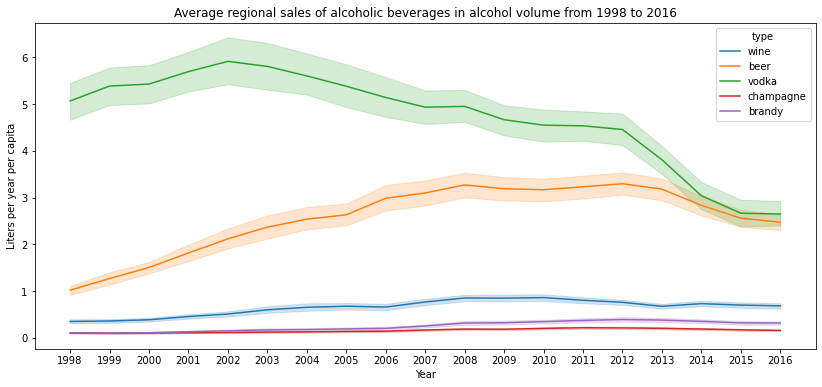

In [34]:
# map the yearly trend of alcoholic beverage sales scaled by alcohol volume
alc_scaled_tidy = pd.melt(alc_scaled, \
                          id_vars = ['year', 'region'], \
                          value_vars=['wine', 'beer','vodka','champagne','brandy'],\
                         var_name = 'type')

plt.figure(figsize=(14,6))
plt.xticks(np.arange(1998, 2017))
sns.lineplot(x='year', y='value', hue='type', data=alc_scaled_tidy)
plt.title('Average regional sales of alcoholic beverages in alcohol volume from 1998 to 2016')
plt.xlabel('Year')
plt.ylabel('Liters per year per capita')

Takeaway:

- Fall of vodka sales average coincides the rise of beer sales 
- While I cannot conclusively say that vodka or beer is the most popular among regions in Russia, we can see that they are very close.

***Bootstrap sampling***

How can we verify that that vodka is still the most popular alcoholic beverage in terms of regional averages?
This can be done by a quick statistical simulation, where we try to 're-create' iterations of vodka and champagne regional sales data and calculate the proportion of times in which the vodka sales average was higher than that of beer.  

In [35]:
size = 10000 # number of simulation
diff_avg = [] # initiate an empty list to store difference in averages

random.seed(125)

for i in range(size):
    data = alc_scaled[alc_scaled['year'] == 2016][['beer', 'vodka']]
    vodka_bootstrap = np.random.choice(data['vodka'], size=data.shape[0], replace=True)
    beer_bootstrap = np.random.choice(data['beer'], size=data.shape[0], replace=True)
    diff_avg.append(vodka_bootstrap.mean() - beer_bootstrap.mean())

diff_avg = np.array(diff_avg)

In [36]:
vodka_popular = round((diff_avg > 0).sum()/len(diff_avg) * 100, 2)

print('Vodka was the most poupular choice of drink in {}% of the simulation result.'.format(vodka_popular))

Vodka was the most poupular choice of drink in 86.02% of the simulation result.


In statistical analysis, it is common practice to determine validity of the result based on the probability of desired outcome occuring, and the threshold used is often 90 or 95%. 

Judging from that practice, our result would be statistically insignificant to determine that vodka is the most popular choice of beverage. 

## Modeling/Prediction

What about in the future? Beer and vodka is pretty close as of 2016, but how about in future years?

### Regression

Before using regression to predict the future values, we need to determine the exponent that is most suitable for running the regression. To determine that, we plot the residual, the difference between projected value from a fitted line (projection) and the actual value. If residual is spread randomly (and therefore evenly) across 0, we found the right order. Otherwise, the fitted line is interpreted to overshoot or undershoot its projected value. 

***Determine the right order***

Text(0.5, 1.0, 'Residual plot for beer with order = 1')

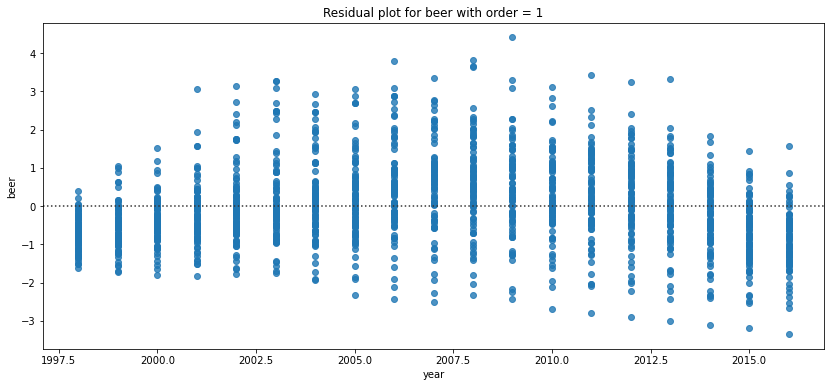

In [45]:
# residual plot for beer, order = 1 
plt.figure(figsize=(14,6))
sns.residplot(x=alc_scaled['year'], y=alc_scaled['beer'], order=1)
plt.title('Residual plot for beer with order = 1')

Text(0.5, 1.0, 'Residual plot for beer with order = 2')

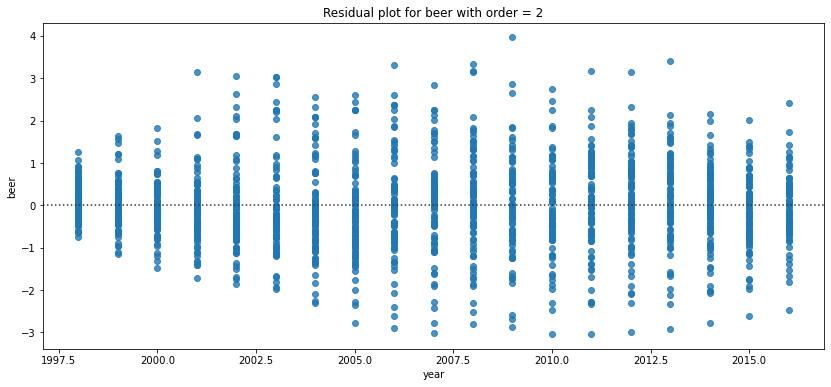

In [46]:
# residual plot for beer, order = 2
plt.figure(figsize=(14,6))
sns.residplot(x=alc_scaled['year'], y=alc_scaled['beer'], order=2)
plt.title('Residual plot for beer with order = 2')

Takeaway:
- order = 2 seems has residual values evenly spread across for beer value

Text(0.5, 1.0, 'Residual plot for vodka with order = 1')

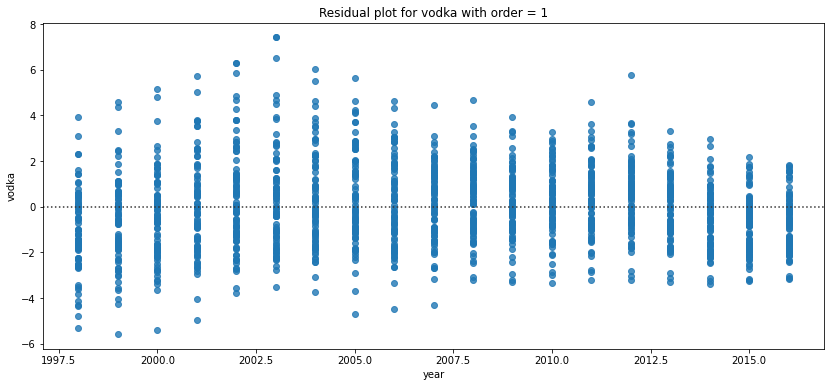

In [48]:
# residual plot for vodka, order = 1 
plt.figure(figsize=(14,6))
sns.residplot(x=alc_scaled['year'], y=alc_scaled['vodka'], order=1)
plt.title('Residual plot for vodka with order = 1')

Text(0.5, 1.0, 'Residual plot for vodka with order = 2')

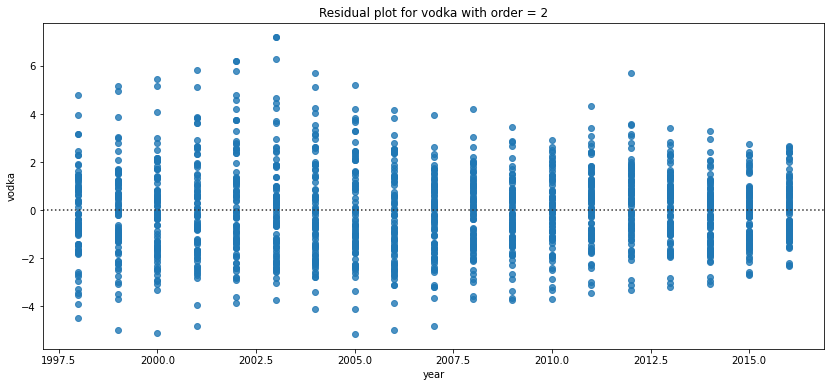

In [40]:
# residual plot for beer, order = 2
plt.figure(figsize=(14,6))
sns.residplot(x=alc_scaled['year'], alc_scaled['vodka'], order=2)
plt.title('Residual plot for vodka with order = 2')

Takeaway:
- order = 2 seems has residual values evenly spread across for vodka value

In [41]:
# Perform OLS on vodka sales 
# Exclude brandy data is due to multicoliniarity

import statsmodels.formula.api as smf

alc_scaled['champagne_log'] = np.log(alc_scaled['champagne']) # 
alc_scaled['year_0'] = alc_scaled['year'] - alc_scaled['year'].min() # making year start from 0
alc_scaled['year_0_sq'] = alc_scaled['year_0'] ** 2

model_vod = smf.ols('vodka ~ year_0_sq + beer + wine + champagne_log + region', data = alc_scaled).fit()
print(model_vod.summary())

                            OLS Regression Results                            
Dep. Variable:                  vodka   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     62.56
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:34:26   Log-Likelihood:                -2074.0
No. Observations:                1549   AIC:                             4324.
Df Residuals:                    1461   BIC:                             4794.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Takeaway
- After removing the effects from regional differences and other beverage purchases, Russians year by year purchase less vodka per year, suggested by the negative coefficient of year_0_sq.
- Effect of year and other beverage sales are all statistically siginificant
- Some regions do drink more/less than other regions, as observed by statistically significant  for many, but not for all, regions.
- Translating the scale, this means that regional averages are reduced by 0.5L less vodka year by year 
- However, this does not mean that people are drinking less because they are choosing other beverage choice
- Positive coefficient of beer, wine and champagne_log suggest that if people buy more of other alcoholic beverages, they also buy more vodka as well.

In [42]:
# Beer regression
model_beer = smf.ols('beer ~ year_0_sq + vodka + wine + champagne_log + region', data = alc_scaled).fit()
print(model_beer.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     29.79
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          2.33e-262
Time:                        18:34:26   Log-Likelihood:                -1716.4
No. Observations:                1549   AIC:                             3609.
Df Residuals:                    1461   BIC:                             4079.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Takeaway:
- Small, but positive coefficient value for year_0_sq suggest that beer value is projected to increase

### Prediction

So where does that leave us? 

Scaled by alcohol consumption level, will beer overtake vodka as the most popular alcoholic beverage? 

If so, when?

In [43]:
# make years
year_pred = np.arange(18, 30) # years to predict

# Make prediction
vod_pred = []
vod_pred = model_vod.params['year_0_sq'] * (year_pred-18)**2 + alc_scaled[alc_scaled['year_0'] == 18]['vodka'].mean() 

beer_pred = []
beer_pred = model_beer.params['year_0_sq'] * (year_pred-18)**2 + alc_scaled[alc_scaled['year_0'] == 18]['beer'].mean()

# prediction dataframe
pred = pd.DataFrame({'year' : year_pred, 'vodka prediction' : vod_pred, 'beer prediction' : beer_pred})
pred

,year,vodka prediction,beer prediction
0,18,2.650120,2.474337
1,19,2.638819,2.476835
2,20,2.604914,2.484326
3,21,2.548407,2.496813
4,22,2.469296,2.514294
5,23,2.367583,2.536769
6,24,2.243266,2.564239
7,25,2.096346,2.596703
8,26,1.926823,2.634162
9,27,1.734698,2.676616


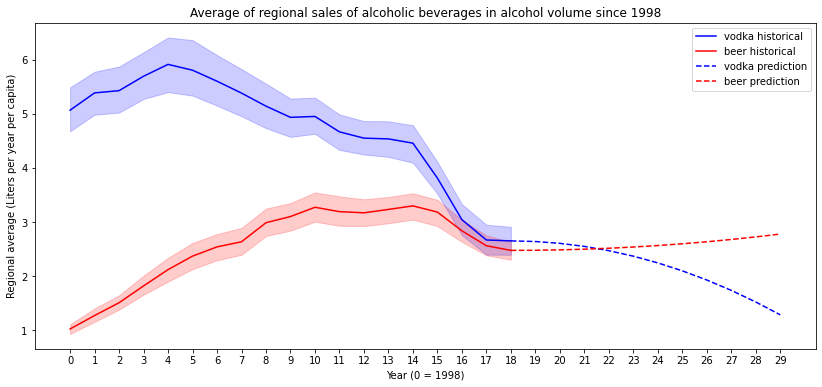

In [44]:
plt.figure(figsize=(14,6))
plt.title('Average of regional sales of alcoholic beverages in alcohol volume since 1998')
plt.xlabel('Year (0 = 1998)')
plt.ylabel('Regional average (Liters per year per capita)')
plt.xticks(np.arange(0, 30))
_ = sns.lineplot(x='year_0', y='vodka', data=alc_scaled, label='vodka historical', color='blue')
_ = sns.lineplot(x='year_0', y='beer', data=alc_scaled, label='beer historical', color='red')
_ = sns.lineplot(x='year', y='vodka prediction', data=pred, label = 'vodka prediction', color='blue', linestyle='--')
_ = sns.lineplot(x='year', y='beer prediction', data=pred, label = 'beer prediction', color='red', linestyle='--')
plt.legend()

Takeaway:
- In recent years, slope was getting flatter for both the vodka and beer sales, which means that both vodka and beer sales were getting plateaued
- Judging from the historical trend, however, beer is projected to take over vodka to have the highest average of regional per capital sales between 2019 and 2020.

## Conclusion

Based on the set of analysis, I believe beer is projected to take over vodka as the most popular drink in early 2020s. However, there are potential areas of improvements:

1. Further validate the alcoholic percentage used to scale the data\
2. Weight the projected